In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df = pd.read_csv(r"C:\Users\temisola\DMML-Dubai-UG-Group-2\Datasets\processed\tabular_data\brain_tumor_dataset.csv")
df.info()
df.describe()
df.isnull().sum()

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Gender'].fillna('Unknown', inplace=True)

scaler = StandardScaler()
num_cols = ['Age', 'Tumor_Size']
df[num_cols] = scaler.fit_transform(df[num_cols])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

C:\Users\temisola\AppData\Local\Temp\ipykernel_3240\2146798110.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\temisola\AppData\Local\Temp\ipykernel_3240\2146798110.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [6]:
print(df.shape)        # Rows, columns
print(df['Histology'].value_counts())  # Class distribution

(20000, 19)
Histology
Glioblastoma       5068
Meningioma         5016
Medulloblastoma    4979
Astrocytoma        4937
Name: count, dtype: int64



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


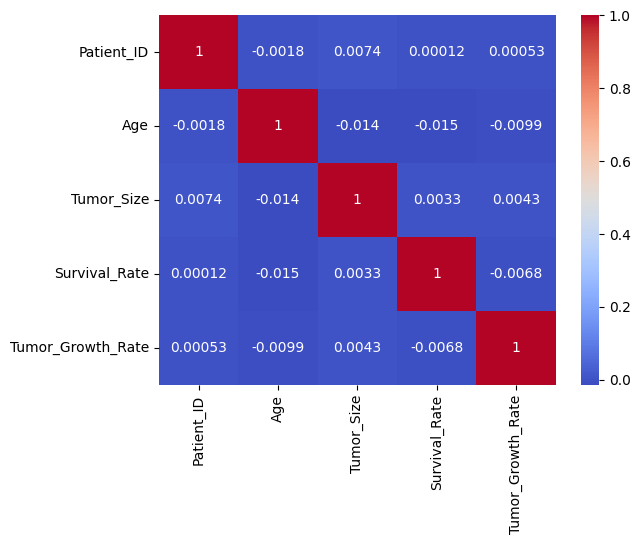

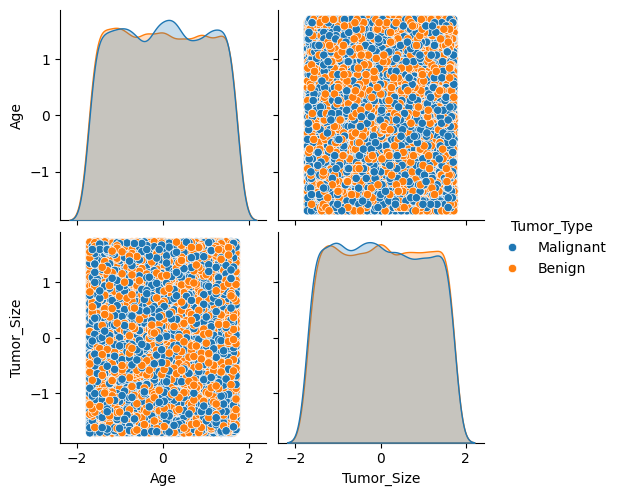

In [2]:
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='Tumor_Type', data=df)

# Correlation heatmap
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Pairplot for numeric features
sns.pairplot(df[num_cols + ['Tumor_Type']], hue='Tumor_Type')


In [9]:

#defining input and target classes
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns = ['Patient_ID', 'Histology'])
y = df['Histology']

#Encode Y to convert to numbers for easier classification
le = LabelEncoder()
y = le.fit_transform(y)

X = pd.get_dummies(X, drop_first=True)



In [10]:
# split the dataset for training and tessting 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    #test size of 20%
    random_state=42,  
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

#checking the distribution of classes in training and test sets

Training set size: (16000, 27)
Test set size: (4000, 27)


In [16]:
print("Any missing values?", X.isnull().sum().sum() > 0)
print("Number of features:", X.shape[1])
print("Target classes:", pd.Series(y).value_counts())

new_cols = X_encoded.columns
print("Encoded feature names:\n", new_cols)
print("Total features:", len(new_cols))


Any missing values? False
Number of features: 27
Target classes: 1    5068
3    5016
2    4979
0    4937
Name: count, dtype: int64
Encoded feature names:
 Index(['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate',
       'Gender_Male', 'Tumor_Type_Malignant', 'Location_Occipital',
       'Location_Parietal', 'Location_Temporal', 'Stage_II', 'Stage_III',
       'Stage_IV', 'Symptom_1_Nausea', 'Symptom_1_Seizures',
       'Symptom_1_Vision Issues', 'Symptom_2_Nausea', 'Symptom_2_Seizures',
       'Symptom_2_Vision Issues', 'Symptom_3_Nausea', 'Symptom_3_Seizures',
       'Symptom_3_Vision Issues', 'Radiation_Treatment_Yes',
       'Surgery_Performed_Yes', 'Chemotherapy_Yes', 'Family_History_Yes',
       'MRI_Result_Positive', 'Follow_Up_Required_Yes'],
      dtype='object')
Total features: 27


In [25]:
#next, train a machine learning model 
#initialize the model

dt_model = DecisionTreeClassifier(
    criterion='gini',    # Measures impurity: 'gini' or 'entropy'
    max_depth=None,      # Let tree grow fully first; can limit to avoid overfitting
    random_state=42      # For reproducibility
)

In [26]:
#train the model.

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
#make predictions on the test set

y_pred = dt_model.predict(X_test)
print(y_pred[:10])  # Shows the first 10 predictions

for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")



[1 1 1 3 3 0 3 2 2 3]
Actual: 3, Predicted: 1
Actual: 0, Predicted: 1
Actual: 2, Predicted: 1
Actual: 0, Predicted: 3
Actual: 1, Predicted: 3
Actual: 3, Predicted: 0
Actual: 0, Predicted: 3
Actual: 0, Predicted: 2
Actual: 0, Predicted: 2
Actual: 2, Predicted: 3
